In [11]:
import pandas as pd

In [12]:
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col = 0)

In [13]:
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [14]:
data.tail(10)

,TV,radio,newspaper,sales
191,39.5,41.1,5.8,10.8
192,75.5,10.8,6.0,9.9
193,17.2,4.1,31.6,5.9
194,166.8,42.0,3.6,19.6
195,149.7,35.6,6.0,17.3
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [16]:
data.shape

(200, 4)

In [17]:
import seaborn as sns

In [18]:
%matplotlib inline

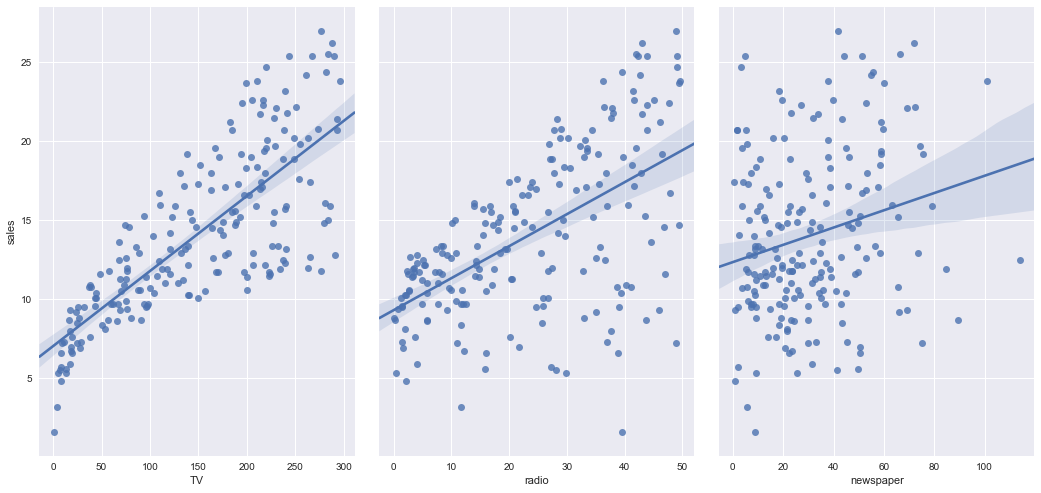

In [26]:
sns.pairplot(data, x_vars = ['TV','radio','newspaper'],y_vars = 'sales',size=7,aspect=0.7, kind = 'reg')

In [28]:
feature_cols = ['TV','radio','newspaper']

In [29]:
X=data[feature_cols]

In [35]:
X.head()
type(X)

pandas.core.frame.DataFrame

In [33]:
y=data['sales']

In [34]:
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

In [36]:
type(y)

pandas.core.series.Series

In [37]:
from sklearn.cross_validation import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X,y,random_state=1)

C:\Users\jmkhat\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [40]:
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(150, 3)
(150,)
(50, 3)
(50,)


In [41]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [42]:
print(linreg.intercept_)
print(linreg.coef_)

2.87696662232
[ 0.04656457  0.17915812  0.00345046]


In [49]:
zipped = list(zip(feature_cols, linreg.coef_)) 
print(zipped)

[('TV', 0.046564567874150288), ('radio', 0.17915812245088836), ('newspaper', 0.0034504647111803788)]


In [51]:
y_pred = linreg.predict(X_test)